In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Importing data from CSV

In [8]:
readCSV = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

df = pd.DataFrame(readCSV)

print(df)

                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1849-01-01              26.704                          1.435   
1       1849-02-01              27.434                          1.362   
2       1849-03-01              28.101                          1.612   
3       1849-04-01              26.140                          1.387   
4       1849-05-01              25.427                          1.200   
...            ...                 ...                            ...   
239172  2013-05-01              18.979                          0.807   
239173  2013-06-01              23.522                          0.647   
239174  2013-07-01              25.251                          1.042   
239175  2013-08-01              24.528                          0.840   
239176  2013-09-01                 NaN                            NaN   

           City        Country Latitude Longitude  
0       Abidjan  Côte D'Ivoire    5.63N     3.23W  
1       Abidjan  Cô

In [45]:
column_list = ['dt', 'AverageTemperature', 'City', 'Country']

dataKiev = df.loc[df['City'] =='Kiev']

TempKiev = dataKiev[column_list]

Temp_above_1900 = TempKiev[dataKiev['dt'] > '1900-01-01']

Temp_above_1900 = Temp_above_1900.set_index('dt')
Temp_above_1900


,AverageTemperature,City,Country
dt,,,
1900-02-01,-3.938,Kiev,Ukraine
1900-03-01,-2.412,Kiev,Ukraine
1900-04-01,5.711,Kiev,Ukraine
1900-05-01,13.840,Kiev,Ukraine
1900-06-01,16.916,Kiev,Ukraine
...,...,...,...
2013-05-01,19.000,Kiev,Ukraine
2013-06-01,21.222,Kiev,Ukraine
2013-07-01,20.483,Kiev,Ukraine


## Clearing NaNs

Got only one NaN between 1900 and 2013. Probably this data set was created when meteorologists from Kiev had not yet sent the data.

In [24]:
NaN_counter = Temp_above_1900['AverageTemperature'].isna().sum()
print('How many NaNs:', NaN_counter)

How many NaNs: 1


In [27]:
Temp_above_1900 = Temp_above_1900[Temp_above_1900['AverageTemperature'].notna()]
Temp_above_1900

,AverageTemperature,City,Country
dt,,,
1900-02-01,-3.938,Kiev,Ukraine
1900-03-01,-2.412,Kiev,Ukraine
1900-04-01,5.711,Kiev,Ukraine
1900-05-01,13.840,Kiev,Ukraine
1900-06-01,16.916,Kiev,Ukraine
...,...,...,...
2013-04-01,9.827,Kiev,Ukraine
2013-05-01,19.000,Kiev,Ukraine
2013-06-01,21.222,Kiev,Ukraine


Text(0, 0.5, 'Frequency')

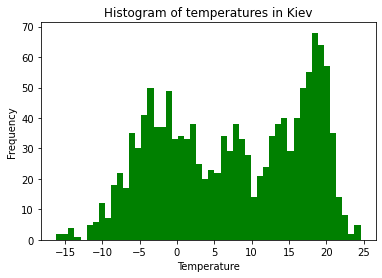

In [38]:
ax = Temp_above_1900['AverageTemperature'].plot(kind = 'hist', bins = 50, color = 'green',
title = 'Histogram of temperatures in Kiev')

ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')

In [49]:
df_months = Temp_above_1900

df_months = df_months.reset_index()

df_months['month'] = pd.DatetimeIndex(df_months['dt']).month

df_months


,dt,AverageTemperature,City,Country,month
0,1900-02-01,-3.938,Kiev,Ukraine,2
1,1900-03-01,-2.412,Kiev,Ukraine,3
2,1900-04-01,5.711,Kiev,Ukraine,4
3,1900-05-01,13.840,Kiev,Ukraine,5
4,1900-06-01,16.916,Kiev,Ukraine,6
...,...,...,...,...,...
1359,2013-05-01,19.000,Kiev,Ukraine,5
1360,2013-06-01,21.222,Kiev,Ukraine,6
1361,2013-07-01,20.483,Kiev,Ukraine,7
1362,2013-08-01,19.944,Kiev,Ukraine,8


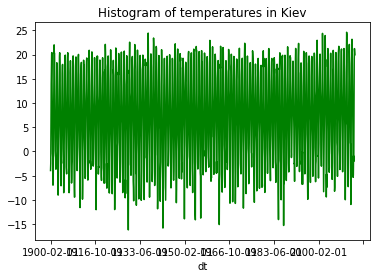

In [50]:
ax = Temp_above_1900['AverageTemperature'].plot(kind = 'line', color = 'green',
title = 'Histogram of temperatures in Kiev')

ax

## As we see, data is really illegible. We need to look closer at it. 

In [60]:
def get_month_from_DF(df, column_name:str, month:int):
    return df.loc[df[column_name] == month]

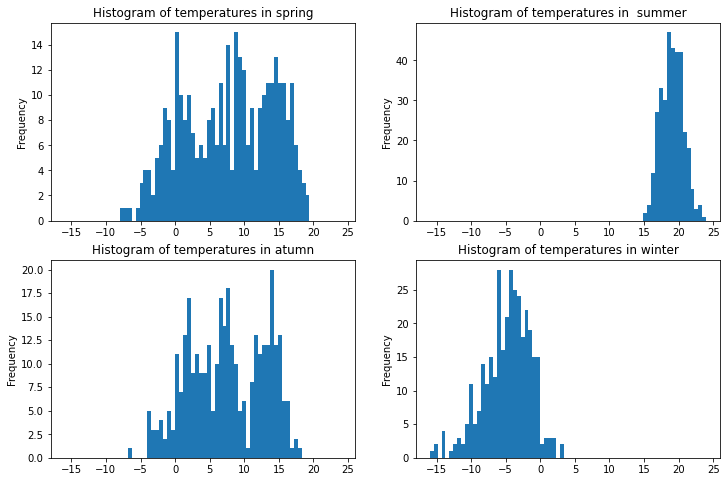

In [80]:

spring = df_months.loc[df_months['month'].isin([3, 4, 5])]
summer = df_months.loc[df_months['month'].isin([6, 7, 8])]
atumn = df_months.loc[df_months['month'].isin([9, 10, 11])]
winter = df_months.loc[df_months['month'].isin([12, 1, 2])]

df_list = [spring, summer, atumn, winter]
month_list = ['spring', 'summer', 'atumn','winter']

fig, axes = plt.subplots(2,2, figsize = (12,8))
count = 0

for row in range(2):
    for column in range(2):
        hist_title = f'Histogram of temperatures in {month_list[count]}'
        df = df_list[count]
        df['AverageTemperature'].plot(kind = 'hist', bins = 70, range = [-16,24], ax = axes[row, column], title = hist_title)
        count += 1


In [120]:
DF_list = []

for i in range(12):
    DF_list.append(get_month_from_DF(df_months, 'month', i+1))
DF_list

[              dt  AverageTemperature  City  Country  month
 11    1901-01-01              -6.957  Kiev  Ukraine      1
 23    1902-01-01              -1.276  Kiev  Ukraine      1
 35    1903-01-01              -5.329  Kiev  Ukraine      1
 47    1904-01-01              -7.085  Kiev  Ukraine      1
 59    1905-01-01              -8.516  Kiev  Ukraine      1
 ...          ...                 ...   ...      ...    ...
 1307  2009-01-01              -4.193  Kiev  Ukraine      1
 1319  2010-01-01              -9.968  Kiev  Ukraine      1
 1331  2011-01-01              -4.002  Kiev  Ukraine      1
 1343  2012-01-01              -4.732  Kiev  Ukraine      1
 1355  2013-01-01              -4.874  Kiev  Ukraine      1
 
 [113 rows x 5 columns],
               dt  AverageTemperature  City  Country  month
 0     1900-02-01              -3.938  Kiev  Ukraine      2
 12    1901-02-01              -5.987  Kiev  Ukraine      2
 24    1902-02-01              -3.667  Kiev  Ukraine      2
 36    1903-0

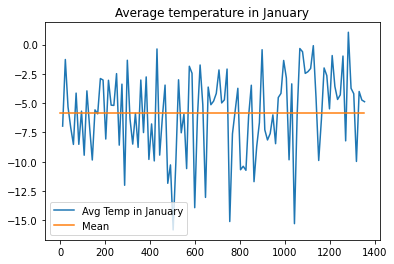

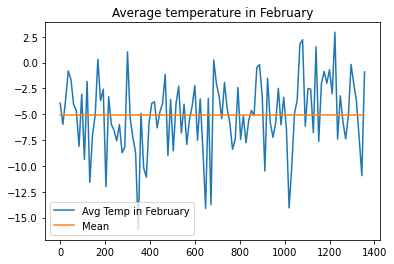

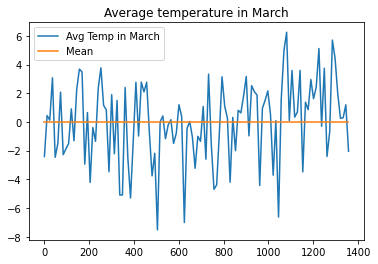

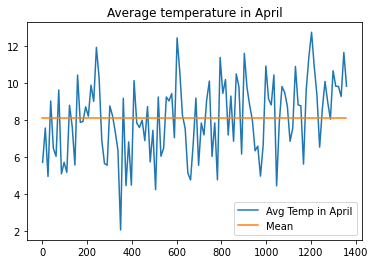

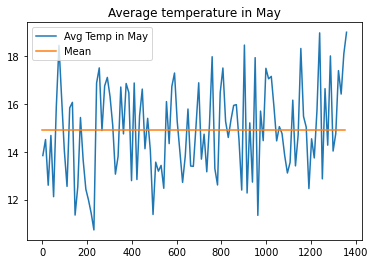

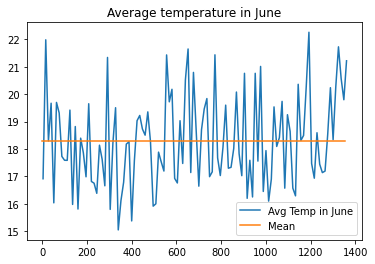

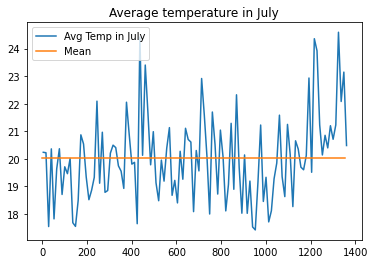

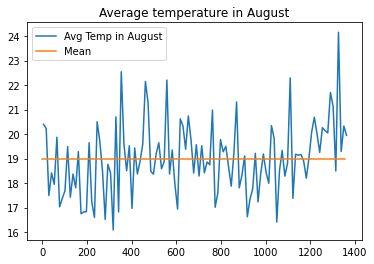

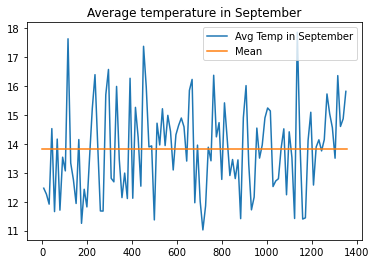

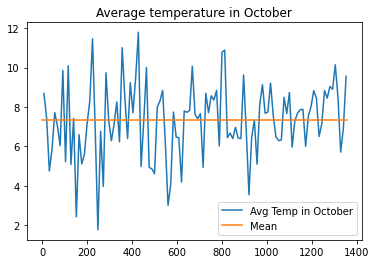

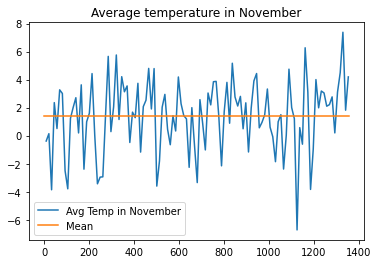

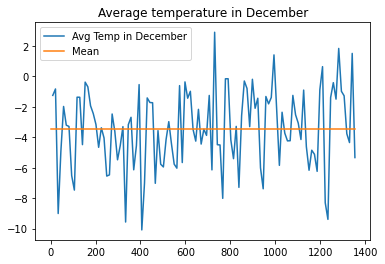

In [122]:
mo_list = ['January', 'February', 'March', 'April', 'May', 'June', 
'July', 'August', 'September', 'October', 'November', 'December']

count = 0

for DF in DF_list:
    title_plot = f'Average temperature in {mo_list[count]}'
    
    column_mean_df = DF['AverageTemperature'].mean()

    DF['AverageTemperature'].plot(title = title_plot, label = f'Avg Temp in {mo_list[count]}')
    plt.plot([0,1354], [column_mean_df, column_mean_df], label = 'Mean')
    plt.legend()
    count += 1
    plt.show()